# Assignment 2 
- 1D 2 class Gaussian Discriminent
- 2D 2 class Gaussian Discriminent
- kD k class Gaussian Discriminent



### setting all the imports

In [148]:
# all imports
%matplotlib inline
# from numpy
from numpy import log
import numpy as np
from numpy.linalg import inv
from numpy.linalg import det

# from scipy
import scipy as sc

# from sklearn
import sklearn
from sklearn.metrics import precision_recall_curve
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import datasets, linear_model
from sklearn.cross_validation import KFold    
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import train_test_split #  this is used for cross validation 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

# from pandas
import pandas as pd

#from matplot
import matplotlib.pyplot as plt
import matplotlib 

# regular python imports
import math
import collections # this is used to perform the collection  based sorting  and unique element identification
from functools import partial # this is to accomdate partials
import random
import os
import re

In [149]:
class TestMetrics:
    
    def setData(self,y_test,y_pred_class):
            self.y_test = y_test
            self.y_pred_class = y_pred_class
#             print 'True:', y_test
#             print 'Pred:', y_pred_class
        
    def getMatrics(self):
        #print metrics.accuracy_score(self.y_test, self.y_pred_class)
        # save confusion matrix and slice into four pieces
        confusion = metrics.confusion_matrix(self.y_test, self.y_pred_class)
#       print "confusion matrix:",confusion
        TP = confusion[1, 1]
        TN = confusion[0, 0]
        FP = confusion[0, 1]
        FN = confusion[1, 0]
        if math.isnan(TP):
            print "tp is nan"
            TP = 0
        if math.isnan(TN):
            print "tn is nan"
            TN = 0
        if math.isnan(FP):
            print "fp is nan"
            FP = 0
        if math.isnan(FN):
            print " is nan"
            FN = 0       

        #Classification Accuracy: Overall, how often is the classifier correct?
        #Classification_Accuracy = (TP + TN) / float(TP + TN + FP + FN)
        Classification_Accuracy = metrics.accuracy_score(self.y_test, self.y_pred_class)
        #print "#Classification Accuracy:\t",Classification_Accuracy
       
        #Classification Error: Overall, how often is the classifier incorrect?
        #Classification_Error = (FP + FN) / float(TP + TN + FP + FN)
        Classification_Error =  1 - metrics.accuracy_score(self.y_test, self.y_pred_class)
        
        #Sensitivity:
        Sensitivity = TP / float(TP + FN)
        #print "#Sensitivity:\t",Sensitivity
        #Specificity: 
        Specificity = TN / float(TN + FP) 
        #print "#Specificity:\t",Specificity
        #False Positive Rate:
        False_Positive_Rate = FP / float(TN + FP)
        #print "#False Positive Rate:",False_Positive_Rate
        #Precision: 
        #Precision = TP / float(TP + FP)
        Precision = metrics.precision_score(self.y_test, self.y_pred_class)
        #print "#Precision:\t",Precision
        #print metrics.precision_score(y_test, y_pred_class)
        #print TP,TN,FP,FN,Classification_Accuracy,Classification_Error,Sensitivity,Specificity,False_Positive_Rate,Precision
        return TP,TN,FP,FN,Classification_Accuracy,Classification_Error,Sensitivity,Specificity,False_Positive_Rate,Precision
#test        
# tm  = TestMetrics()
# tm.setData(Y,Y)
# tm.getMatrics()

In [150]:
# fetching all data

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:,:]  # we only take the first two features.
Y = iris.target

print X.shape
print Y.shape
# list of common functions
numberOfClass = lambda listValues :list(set(listValues))# this is the number of classes in each dataset

m = lambda listValues: collections.Counter(listValues)

idf = lambda currentClass,itratingClass : (0,1)[currentClass == itratingClass] # this is the indicator function

mean = lambda X_D,Y_D:[np.mean([idf(Y_D[rowIndex],classElement)*rowElements for rowIndex,rowElements in enumerate(X_D)if idf(Y_D[rowIndex],classElement)== 1],axis = 0) for classIndex ,classElement in enumerate(numberOfClass(Y_D))]

varience =lambda X_D,Y_D:[np.var([idf(Y_D[rowIndex],classElement)*rowElements 
                                  for rowIndex,rowElements in enumerate(X_D)if idf(Y_D[rowIndex],classElement)== 1],axis = 0) 
                          for classIndex ,classElement in enumerate(numberOfClass(Y_D))]

alpha = lambda X_D,Y_D:[m(Y_1D)[classElement]*1.0/len(Y_D) for classElement in (numberOfClass(Y_D))]

#this is for 1D calculation
g = lambda x,var,mean,alpha: np.log(alpha)- (((x-mean)**2)/2*(var**2))

covVar =  lambda X_D,Y_D:[np.cov(np.asarray([list(idf(Y_D[rowIndex],classElement)*rowElements) for rowIndex,rowElements in enumerate(X_D)if idf(Y_D[rowIndex],classElement)== 1]).T) for classIndex,classElement in enumerate(numberOfClass(Y_D))]

g_multiVariate = lambda x,co_var_mat,mean,aph: (-1.0*np.log((2*np.pi)**x.shape[1])) - (1.0*np.log(det(co_var_mat)))-(0.5*np.dot(np.dot((x-mean),inv(co_var_mat)),(x-mean).T)) +log(aph)

                                        
def discriminent (x, a_class, b_class):
    sendX = (np.asarray([x])) # sending x as a collection of rows vector
    if (a_class(sendX)>b_class(sendX)) :
        return 0
    else :
        return 1


def discriminent_1 (x, a_class, b_class,c_class):
    sendX = (np.array([x])) # sending x as a collection of rows vector

    if ((a_class(sendX) > b_class(sendX)))and ((a_class(sendX)>c_class(sendX))):
        return 0
    elif((b_class(sendX)>c_class(sendX))>0):
        return 1
    else:
        return 2

(150L, 4L)
(150L,)


In [151]:
class GDA1D2C:
    #this si to fit the existing data
    def fit(self,Xdata,Ydata):
        self.XData = Xdata
        self.YData = Ydata
        #step:1 - find alpha
        self.alpha = alpha(Xdata,Ydata)
        #step:2 - find mean 
        self.mean = mean(Xdata,Ydata)
        #print "mean",self.mean
        #step:3 - find varience
        self.varience = varience(Xdata,Ydata)
        #print"varience",self.varience
        #step:4
        g0 = partial(g,var = self.varience[0],mean= self.mean[0],alpha= self.alpha[0])
        g1 = partial(g,var = self.varience[1],mean= self.mean[1],alpha= self.alpha[1])
        #step:5
        self.discriminent = partial(discriminent,a_class = g0, b_class = g1)
    def predict(self,XD):
        return [self.discriminent(xvalue) for xvalue in XD]

In [152]:
class GDAnD2C:
    #this si to fit the existing data
    def fit(self,Xdata,Ydata):
        self.XData = Xdata
        self.YData = Ydata
    
        #step:1 - find alpha
        self.alpha = alpha(Xdata,Ydata)
        #step:2 - find mean 
        self.mean = mean(Xdata,Ydata)
        #print "mean",self.mean
        
        #step:3 - find co_varience
        self.co_varience = covVar(Xdata,Ydata)
        #print"co varience matix",self.co_varience
        

        ## sending the mean as transposed
        self.g0 = partial(g_multiVariate,aph = self.alpha[0],co_var_mat = self.co_varience[0],mean= (np.asarray([self.mean[0]])))
        self.g1 = partial(g_multiVariate,aph = self.alpha[1],co_var_mat = self.co_varience[1],mean= (np.asarray([self.mean[1]])))
        #step:5
        self.discriminent = partial(discriminent,a_class = self.g0, b_class = self.g1)
        #self.discriminent = partial(discriminent,a_class = partial(g,varience = self.varience[0],mean= self.mean[0],alpha= self.alpha[0]), b_class = partial(g,varience = self.varience[1],mean= self.mean[1],alpha= self.alpha[1]))
    # this is to predict y data  from the give X data
    def predict(self,XD):
        return [self.discriminent(xvalue) for xvalue in XD]

In [153]:
class GDAnD3C:
    def fit(self,Xdata,Ydata):
        self.XData = Xdata
        self.YData = Ydata
        #step:1 - find alpha
        self.alpha = alpha(Xdata,Ydata)
    
        #step:2 - find mean 
        self.mean = mean(Xdata,Ydata)
        #print "mean",self.mean
        
        #step:3 - find co_varience
        self.co_varience = covVar(Xdata,Ydata)
        #print"co varience matix",self.co_varience

        
        ## sending the mean as transposed
        self.g0 = partial(g_multiVariate,aph = self.alpha[0],co_var_mat = self.co_varience[0],mean= (np.asarray([self.mean[0]])))
        self.g1 = partial(g_multiVariate,aph = self.alpha[1],co_var_mat = self.co_varience[1],mean= (np.asarray([self.mean[1]])))
        self.g2 = partial(g_multiVariate,aph = self.alpha[2],co_var_mat = self.co_varience[2],mean= (np.asarray([self.mean[2]])))

        #step:5
        self.discriminent = partial(discriminent_1,a_class = self.g0, b_class = self.g1, c_class = self.g2)


    def predict(self,XD):
        return [self.discriminent(xvalue) for xvalue in XD]

# Checking with 2 class 1 features Gaussian discreminent

self Implementation
   Accuracy  Error  FN  FP  False_Positive_Rate  Precision  Sensitivity  \
0       0.9    0.1   1   0             0.000000       1.00     0.500000   
1       0.7    0.3   3   0             0.000000       1.00     0.400000   
2       0.9    0.1   1   0             0.000000       1.00     0.833333   
3       0.9    0.1   1   0             0.000000       1.00     0.800000   
4       0.8    0.2   1   1             0.166667       0.75     0.750000   

   Specificity  TN  TP  
0     1.000000   8   1  
1     1.000000   5   2  
2     1.000000   4   5  
3     1.000000   5   4  
4     0.833333   5   3  
sklearn
   Accuracy  Error  FN  FP  False_Positive_Rate  Precision  Sensitivity  \
0       0.9    0.1   1   0             0.000000       1.00     0.500000   
1       0.7    0.3   3   0             0.000000       1.00     0.400000   
2       0.9    0.1   1   0             0.000000       1.00     0.833333   
3       0.9    0.1   1   0             0.000000       1.00     0.800000

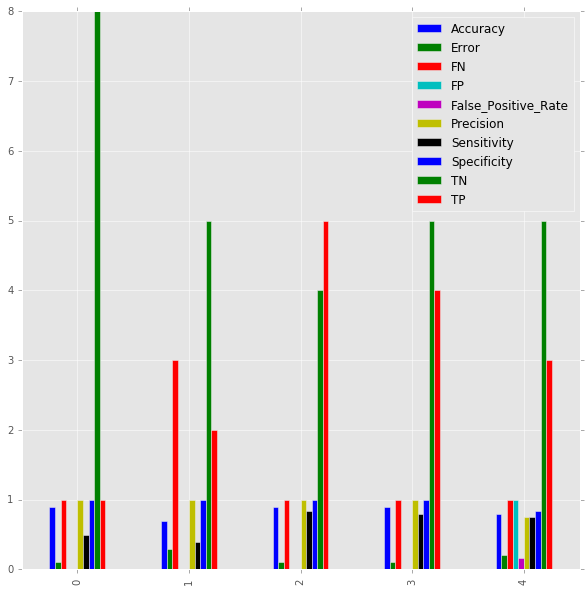

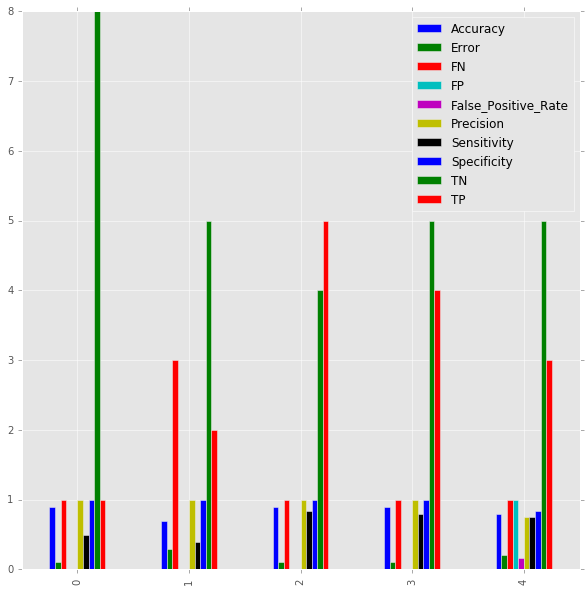

In [154]:
X_1D = X[:100,:1]# this is to take one feature and first 100 data sets
Y_1D = Y [:100] # this is to take 1st 100 data sets


matricsTotal = []
ld_matricsTotal = []
kf = sklearn.cross_validation.KFold(n=len(Y_1D), n_folds=10, shuffle=True,random_state=5)
for train_index, test_index in kf:
    X_train, X_test =[list(X_1D[a]) for a  in train_index],[list(X_1D[a]) for a  in test_index]
    Y_train, Y_test = [Y_1D[a] for a  in train_index],[Y_1D[a] for a  in test_index]

    grad =  GDA1D2C()
    grad.fit(X_train,Y_train)
    predicted_Y_values = grad.predict(X_test)
    #self
    
    tm  = TestMetrics()
    tm.setData(Y_test,predicted_Y_values)
    TP,TN,FP,FN,Classification_Accuracy,Classification_Error,Sensitivity,Specificity,False_Positive_Rate,Precision =  tm.getMatrics()
    matricsTotal.append({"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Accuracy":Classification_Accuracy,"Error":Classification_Error,"Sensitivity":Sensitivity,"Specificity":Specificity,"False_Positive_Rate":False_Positive_Rate,"Precision":Precision})
    
    ### sklearn test 
    ld_grad =   LinearDiscriminantAnalysis()
    ld_grad.fit(X_train,Y_train)
    ld_predicted_Y_values = grad.predict(X_test)
    
    ld_tm  = TestMetrics()
    ld_tm.setData(Y_test,ld_predicted_Y_values)
    TP,TN,FP,FN,Classification_Accuracy,Classification_Error,Sensitivity,Specificity,False_Positive_Rate,Precision =  ld_tm.getMatrics()
    ld_matricsTotal.append({"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Accuracy":Classification_Accuracy,"Error":Classification_Error,"Sensitivity":Sensitivity,"Specificity":Specificity,"False_Positive_Rate":False_Positive_Rate,"Precision":Precision})
 
    
    

matplotlib.style.use('ggplot')

print "self Implementation"
df = pd.DataFrame(matricsTotal).head()
#df.plot.figure(figsize=(50,50))
df.plot(kind = 'bar',figsize =(10 ,10),stacked = False)
print df

print "sklearn"
ld_df = pd.DataFrame(ld_matricsTotal).head()
#df.plot.figure(figsize=(50,50))
ld_df.plot(kind = 'bar',figsize =(10 ,10),stacked = False)
print ld_df

# Checking with 2 class n features Gaussian discreminent

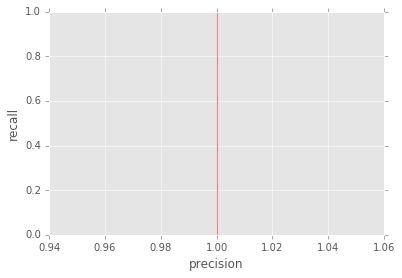

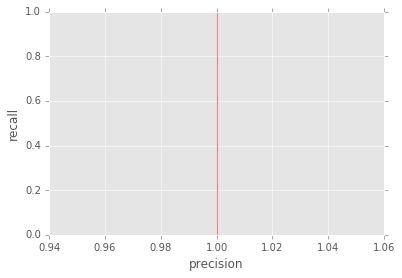

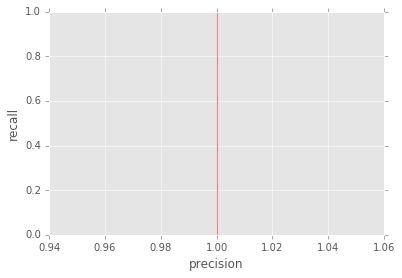

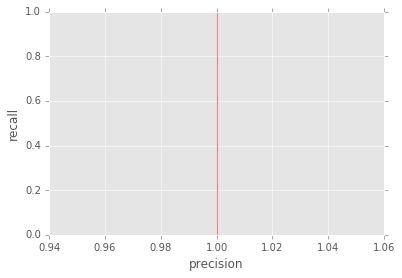

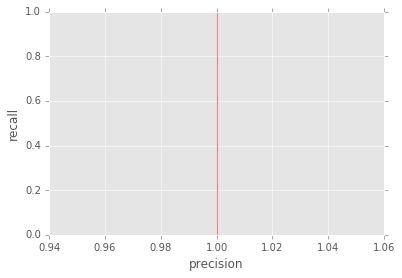

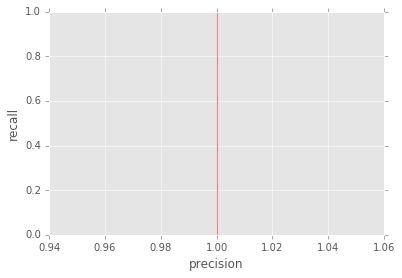

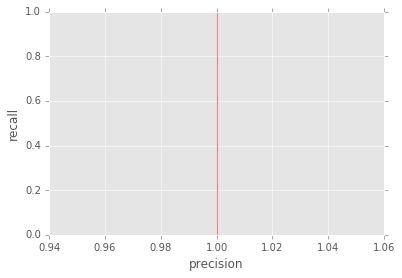

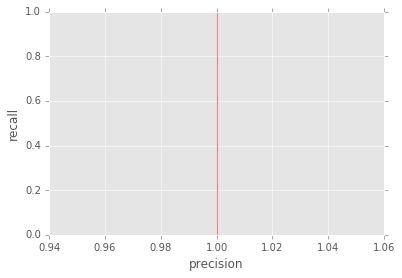

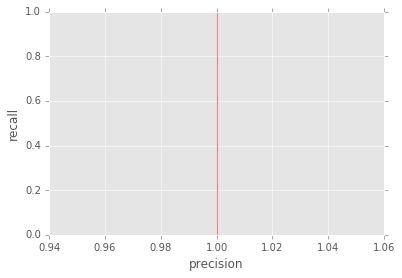

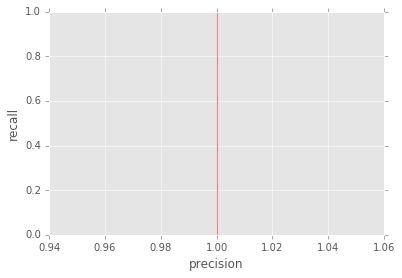

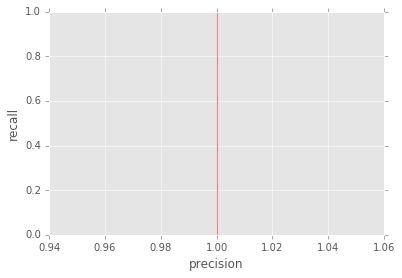

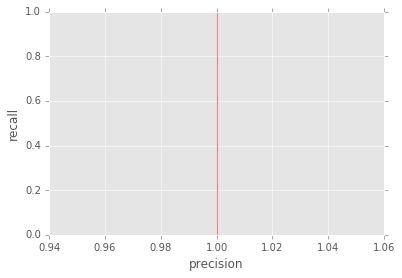

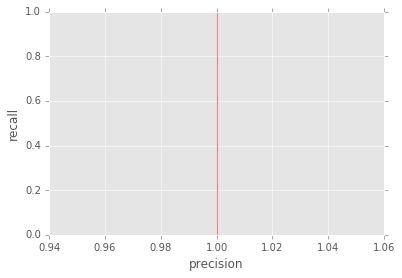

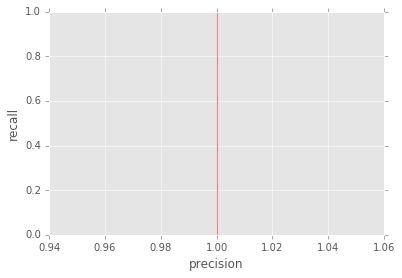

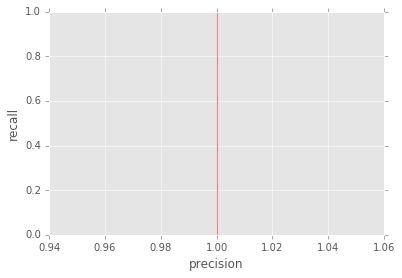

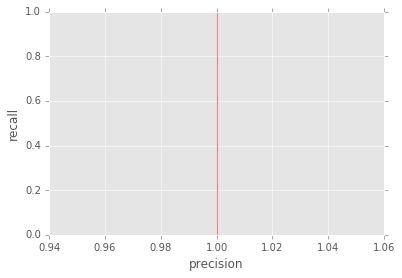

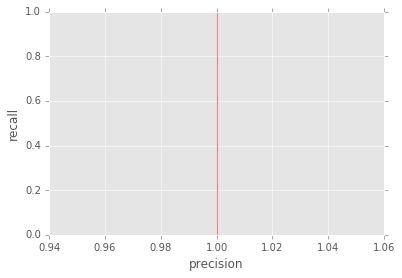

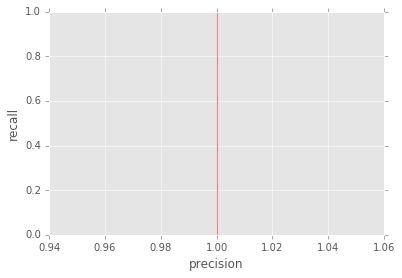

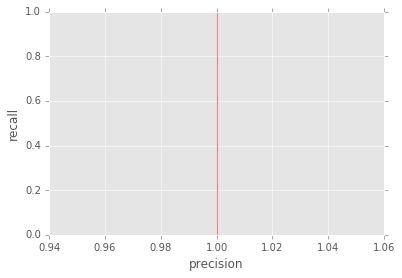

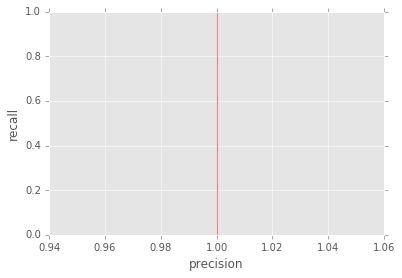

   Accuracy  Error  FN  FP  False_Positive_Rate  Precision  Sensitivity  \
0         1      0   0   0                    0          1            1   
1         1      0   0   0                    0          1            1   
2         1      0   0   0                    0          1            1   
3         1      0   0   0                    0          1            1   
4         1      0   0   0                    0          1            1   

   Specificity  TN  TP  
0            1   8   2  
1            1   5   5  
2            1   4   6  
3            1   5   5  
4            1   6   4  
sklearn -- plots
   Accuracy  Error  FN  FP  False_Positive_Rate  Precision  Sensitivity  \
0         1      0   0   0                    0          1            1   
1         1      0   0   0                    0          1            1   
2         1      0   0   0                    0          1            1   
3         1      0   0   0                    0          1            1   
4      

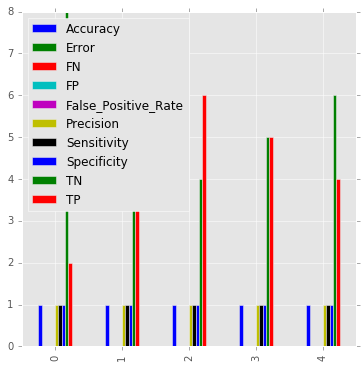

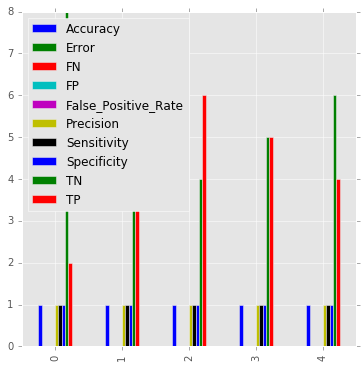

In [155]:
X_2D = X[:100,:]# this is to take one feature and first 100 data sets
Y_2D = Y [:100] # this is to take 1st 100 data sets

matricsTotal = []
ld_matricsTotal = []
kf = sklearn.cross_validation.KFold(n=len(Y_1D), n_folds=10, shuffle=True,random_state=5)
for train_index, test_index in kf:
    X_train, X_test =[X_2D[a] for a  in train_index],[X_2D[a] for a  in test_index]
    Y_train, Y_test = [Y_2D[a] for a  in train_index],[Y_2D[a] for a  in test_index]

    grad =  GDAnD2C()
    grad.fit(X_train,Y_train)
    predicted_Y_values = grad.predict(X_test)
    tm  = TestMetrics()
    tm.setData(Y_test,predicted_Y_values)
    TP,TN,FP,FN,Classification_Accuracy,Classification_Error,Sensitivity,Specificity,False_Positive_Rate,Precision =  tm.getMatrics()
    matricsTotal.append({"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Accuracy":Classification_Accuracy,"Error":Classification_Error,"Sensitivity":Sensitivity,"Specificity":Specificity,"False_Positive_Rate":False_Positive_Rate,"Precision":Precision})
    
    precision, recall, thresholds = precision_recall_curve(Y_test, predicted_Y_values)
    plt.plot(precision, recall, c="red", alpha=0.5)
    plt.xlabel("precision")
    plt.ylabel("recall")
    plt.show()
       
    ### sklearn test 
    ld_grad =   LinearDiscriminantAnalysis()
    ld_grad.fit(X_train,Y_train)
    ld_predicted_Y_values = grad.predict(X_test)
    precision, recall, thresholds = precision_recall_curve(Y_test, ld_predicted_Y_values)
    plt.plot(precision, recall, c="red", alpha=0.5)
    plt.xlabel("precision")
    plt.ylabel("recall")
    plt.show()
    
    ld_tm  = TestMetrics()
    ld_tm.setData(Y_test,ld_predicted_Y_values)
    TP,TN,FP,FN,Classification_Accuracy,Classification_Error,Sensitivity,Specificity,False_Positive_Rate,Precision =  ld_tm.getMatrics()
    ld_matricsTotal.append({"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Accuracy":Classification_Accuracy,"Error":Classification_Error,"Sensitivity":Sensitivity,"Specificity":Specificity,"False_Positive_Rate":False_Positive_Rate,"Precision":Precision})
 
    

df = pd.DataFrame(matricsTotal).head()
matplotlib.style.use('ggplot')
#df.plot.figure(figsize=(50,50))
df.plot(kind = 'bar',figsize =(6 ,6),stacked = False)
print df

print "sklearn -- plots"
ld_df = pd.DataFrame(ld_matricsTotal).head()
#df.plot.figure(figsize=(50,50))
ld_df.plot(kind = 'bar',figsize =(6 ,6),stacked = False)
print ld_df

# Checking with n class n features Gaussian discreminent

C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
C:\Ana

   Accuracy     Error  FN  FP  False_Positive_Rate  Precision  Sensitivity  \
0  0.466667  0.533333   0   0                    0   0.321212            1   
1  0.733333  0.266667   0   0                    0   0.600000            1   
2  0.800000  0.200000   0   0                    0   0.685714            1   
3  0.866667  0.133333   0   0                    0   0.771429            1   
4  0.533333  0.466667   0   0                    0   0.363636            1   

   Specificity  TN  TP  
0            1   4   3  
1            1   7   4  
2            1   8   4  
3            1   8   5  
4            1   4   4  
sklearn -- plots
   Accuracy     Error  FN  FP  False_Positive_Rate  Precision  Sensitivity  \
0  0.466667  0.533333   0   0                    0   0.321212            1   
1  0.733333  0.266667   0   0                    0   0.600000            1   
2  0.800000  0.200000   0   0                    0   0.685714            1   
3  0.866667  0.133333   0   0                    0  

C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
C:\Ana

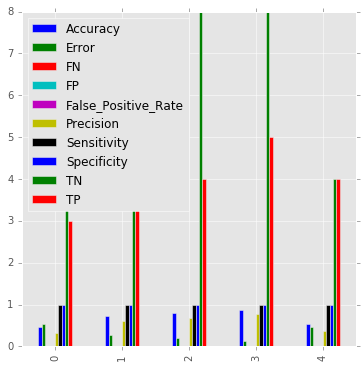

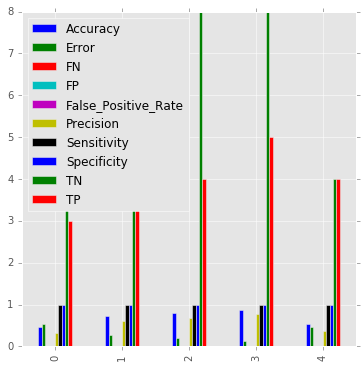

In [156]:
X_nD = X[:,:]# this is to take one feature and first 100 data sets
Y_nD = Y [:] # this is to take 1st 100 data sets

matricsTotal = []
ld_matricsTotal = []
kf = sklearn.cross_validation.KFold(n=len(Y_nD), n_folds=10, shuffle=True)
for train_index, test_index in kf:
    X_train, X_test =[X_nD[a] for a  in train_index],[X_nD[a] for a  in test_index]
    Y_train, Y_test = [Y_nD[a] for a  in train_index],[Y_nD[a] for a  in test_index]

    grad =  GDAnD3C()
    grad.fit(X_train,Y_train)
    predicted_Y_values = grad.predict(X_test)
    tm  = TestMetrics()
    tm.setData(Y_test,predicted_Y_values)
    TP,TN,FP,FN,Classification_Accuracy,Classification_Error,Sensitivity,Specificity,False_Positive_Rate,Precision =  tm.getMatrics()
    matricsTotal.append({"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Accuracy":Classification_Accuracy,"Error":Classification_Error,"Sensitivity":Sensitivity,"Specificity":Specificity,"False_Positive_Rate":False_Positive_Rate,"Precision":Precision})
    
    ### sklearn test 
    ld_grad =   LinearDiscriminantAnalysis()
    ld_grad.fit(X_train,Y_train)
    ld_predicted_Y_values = grad.predict(X_test)
    
    ld_tm  = TestMetrics()
    ld_tm.setData(Y_test,predicted_Y_values)
    TP,TN,FP,FN,Classification_Accuracy,Classification_Error,Sensitivity,Specificity,False_Positive_Rate,Precision =  ld_tm.getMatrics()
    ld_matricsTotal.append({"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Accuracy":Classification_Accuracy,"Error":Classification_Error,"Sensitivity":Sensitivity,"Specificity":Specificity,"False_Positive_Rate":False_Positive_Rate,"Precision":Precision})
 

df = pd.DataFrame(matricsTotal).head()
matplotlib.style.use('ggplot')
#df.plot.figure(figsize=(50,50))
df.plot(kind = 'bar',figsize =(6,6),stacked = False)
print df

print "sklearn -- plots"
ld_df = pd.DataFrame(ld_matricsTotal).head()
#df.plot.figure(figsize=(50,50))
ld_df.plot(kind = 'bar',figsize =(6 ,6),stacked = False)
print ld_df

## Setting the data for Navie Bayes Algorithm


In [185]:
spam_dataset = np.loadtxt("data/spambase.data.txt",dtype = float,delimiter=",")
print "spam dataset shape:",spam_dataset.shape
# print spam_dataset[0]
# for a in spam_dataset:
#     print len(a)
X_spam = spam_dataset[:,:(spam_dataset.shape[1])-1] # this is to create thex dataset 
Y_spam = ((spam_dataset[:,(spam_dataset.shape[1])-1:]).T)[0] # this is to create the ydataset
# print "X_spam", X_spam.shape
# print "Y_spam",Y_spam.shape
# print "X_spam", X_spam
# print "Y_spam",Y_spam
# converting all the frequency in the matrix to boolean. COnsider a row of x rows and y coloumns
X_spam_binary = np.array([[ 1 if y!=0 else 0 for y in x]for x in X_spam])
# print"X_spam_binary",X_spam_binary.shape

print "x_spam show:",xtemp.shape
print "x_spam show:",X_spam.shape

spam dataset shape: (4601L, 58L)
x_spam show: (1L, 4601L, 57L)
x_spam show: (4601L, 57L)


### Naive Bayes for Bernaulli


In [204]:
#BernaulliNB_posterior = lambda x ,alpha,afec,class_num: log(alpha[class_num])+sum([ x[col]*log(afec[class_num])+(1-x[col])*log(1-afec[class_num]) for col  in range(0,x.shape[1])])

def BernaulliNB_posterior(x ,alpha,afec,class_num):
#     print "BernaulliNB_posterior x val",x
    log(alpha[class_num])+ \
    sum([ x[0][col]*log(afec[0][class_num])+(1-x[0][col])*log(1-afec[0][class_num])\
         for col in range(0,x.shape[1])])

# alphaForEachClass = lambda X_D,Y_D:[np.array([sum([X_D[rowIndex][cols] *1.0 for rowIndex  in range(0,X_D.shape[0]) if idf(Y_D[rowIndex],classElement)])
#                                               for cols  in range(0,X_D.shape[1])])/m(Y_1D)[classElement] 
#                                     for classElement in (numberOfClass(Y_D))]
def alphaForEachClass(X_D,Y_D):
    returnList = []
    for classElement in numberOfClass(Y_D):
        returnList.append([(sum([X_D[row][col] for row in range(0,X_D.shape[0])\
                                 if idf(Y_D[row],classElement)])*1.0)/(m(Y_1D)[classElement])\
                           for col in range(0L,X_D.shape[1])])
    return returnList
# def alphaForEachClass(X_D,Y_D):
#     for classElement in (numberOfClass(Y_D):
#         for cols  in range(0,X_D.shape[1]):
#                          for rowIndex  in range(0,X_D.shape[0]):
                         
                         
    
#
class BernaulliNB_Impl:

    def fit(self,xdata,ydata):
        #print ydata.T.tolist()
        # getting alpha 
#         print "number of classes:",numberOfClass(ydata)
#         print "m:",m(ydata)
#         print ""
        self.alpha = alpha(xdata,ydata)
#         print "this is aplha",self.alpha
#         print"xdata" ,xdata
#         print"ydata", ydata
        self.alphaForEachClass = alphaForEachClass(xdata,ydata)
#         print "this alphaForEachClass",self.alphaForEachClass.shape   
#         print "this alphaForEachClass",self.alphaForEachClass   
            
        self.g0 = partial(BernaulliNB_posterior,alpha = self.alpha ,afec = self.alphaForEachClass,class_num = 0)
        self.g1 = partial(BernaulliNB_posterior,alpha = self.alpha ,afec = self.alphaForEachClass,class_num = 1)

        self.discriminent = partial(discriminent,a_class = self.g0, b_class = self.g1)
    def predict(self,XD):
        return [self.discriminent(xvalue) for xvalue in XD]
#test

### Testing Naive bayes for self implemetaion

   Accuracy     Error  FN   FP  False_Positive_Rate  Precision  Sensitivity  \
0  0.396963  0.603037   0  278                    1   0.396963            1   
1  0.369565  0.630435   0  290                    1   0.369565            1   
2  0.373913  0.626087   0  288                    1   0.373913            1   
3  0.419565  0.580435   0  267                    1   0.419565            1   
4  0.393478  0.606522   0  279                    1   0.393478            1   

   Specificity  TN   TP  
0            0   0  183  
1            0   0  170  
2            0   0  172  
3            0   0  193  
4            0   0  181  
values and tables generated from sklearn
   Accuracy     Error  FN  FP  False_Positive_Rate  Precision  Sensitivity  \
0  0.867679  0.132321  38  23             0.082734   0.863095     0.792350   
1  0.882609  0.117391  35  19             0.065517   0.876623     0.794118   
2  0.889130  0.110870  36  15             0.052083   0.900662     0.790698   
3  0.889130  0.1

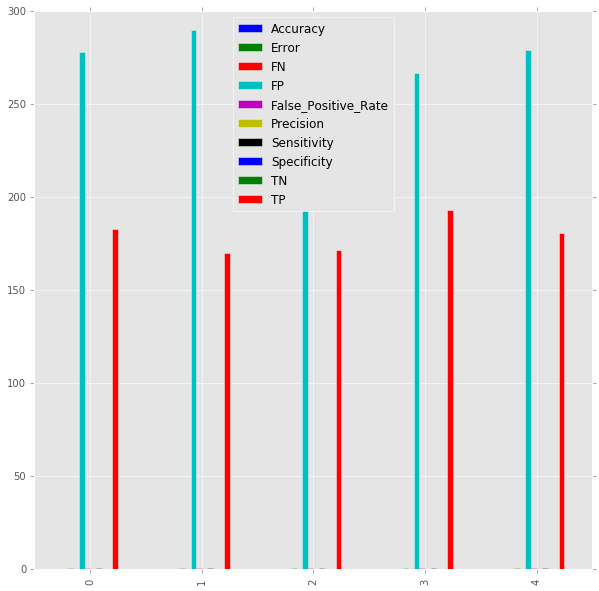

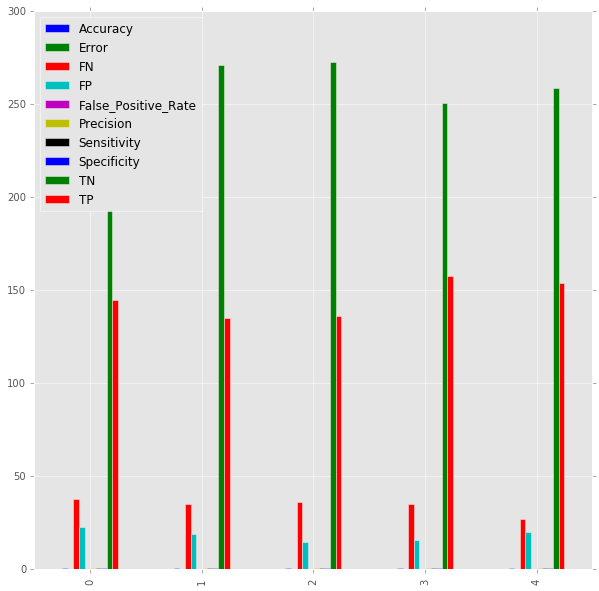

In [205]:
matricsTotal = []
sklearnLibraryMatrix = []
kf = sklearn.cross_validation.KFold(n=len(Y_spam), n_folds=10, shuffle=True)
for train_index, test_index in kf:
    X_train, X_test = (np.array([X_spam_binary[a] for a in train_index])),(np.array([X_spam_binary[a] for a  in test_index]))
    Y_train, Y_test = ([Y_spam[a] for a  in train_index]),([Y_spam[a] for a  in test_index])
    #print Y_train
   
    #self implementaion
    grad =  BernaulliNB_Impl()
    grad.fit(X_train,Y_train)
    predicted_Y_values = grad.predict(X_test)
    
    
    # sklearnimplementation
    clf = BernoulliNB()
    clf.fit(X_train, Y_train)
    clf_predicted = clf.predict(X_test)
    
    # metrics genetation values
    tm  = TestMetrics()
    tm.setData(Y_test,predicted_Y_values)
    TP,TN,FP,FN,Classification_Accuracy,Classification_Error,Sensitivity,Specificity,False_Positive_Rate,Precision =  tm.getMatrics()
    matricsTotal.append({"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Accuracy":Classification_Accuracy,"Error":Classification_Error,"Sensitivity":Sensitivity,"Specificity":Specificity,"False_Positive_Rate":False_Positive_Rate,"Precision":Precision})
 
    # metrics generated values in 
  
    clf_metrics  = TestMetrics()
    clf_metrics.setData(Y_test,clf_predicted)
    TP,TN,FP,FN,Classification_Accuracy,Classification_Error,Sensitivity,Specificity,False_Positive_Rate,Precision =  clf_metrics.getMatrics()
    sklearnLibraryMatrix.append({"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Accuracy":Classification_Accuracy,"Error":Classification_Error,"Sensitivity":Sensitivity,"Specificity":Specificity,"False_Positive_Rate":False_Positive_Rate,"Precision":Precision})



df = pd.DataFrame(matricsTotal).head()
df.plot(kind = 'bar',figsize =( 10,10),stacked = False)
print df

df_metrics =  pd.DataFrame(sklearnLibraryMatrix).head()
matplotlib.style.use('ggplot')
print  "values and tables generated from sklearn"
df_metrics.plot(kind = 'bar',figsize =(10 ,10),stacked = False)
print df_metrics

# Naive Bayes  using binomial distribution

In [254]:
# this is number of
countNumberOfWordsInDocument = lambda x_d:[sum([x_d[row][col] for col in range (0,x_d.shape[1])])\
                                           for row  in range(0,x_d.shape[0])]
pForAGivenClass = lambda X_D,Y_D,lister:[ sum([lister[rows] for rows in range(0,X_D.shape[0]) \
                                               if idf(Y_D[rows],classElement) ])\
                                         for classElement in numberOfClass(Y_D)]   
def BinomialNB_posterior(x ,alpha,afec,class_num):
    x_var=x[0]
    afec_var=afec
    returnVal = log(alpha[class_num])+ \
    sum([ log(sc.misc.comb(sum(x_var), x_var[col], exact=True)* \
              (float(afec_var[class_num][col])**x_var[col])*\
              (float(1.0-(afec_var[class_num][col])*1.0)**(float(sum(x_var))-x_var[col])))\
         for col in range(0,x.shape[1])])
    return returnVal

def alphaForEachClass_1(X_D,Y_D,pfagc):
    returnList = []
    print m(Y_1D)[1]
    print pfagc
#     print X_D
    return[[(sum([X_D[row][col] for row in range(0,X_D.shape[0])if idf(Y_D[row],classElement)])*1.0)/((m(Y_1D)[classElement])*pfagc[classindex]*1.0)+2.0 for col in range(0,X_D.shape[1])]for classindex,classElement in enumerate (numberOfClass(Y_D))]
#     for classindex,classElement in enumerate (numberOfClass(Y_D)):
#         print classindex,classElement
#         for col in range(0,X_D.shape[1]):
#             returnList.append([(sum([X_D[row][col] for row in range(0,X_D.shape[0])if idf(Y_D[row],classElement)])\
#                                 *1.0)/((m(Y_1D)[classElement])*pfagc[classindex]*1.0)+2.0])
#     return returnList
    

# def alphaForEachClass_1(X_D,Y_D,pfagc):
#     returnList = []
#     for classindex,classElement in enumerate (numberOfClass(Y_D)):
#         print classindex,classElement
#         returnList.append([(sum([X_D[row][col] for row in range(0,X_D.shape[0])\
#                                  if idf(Y_D[row],classElement)])*1.0)/((m(Y_1D)[classElement])*pfagc[classindex])+2\
#                            for col in range(0,X_D.shape[1])])
#     return returnList

    
class BinomialNB_Impl:

    def fit(self,xdata,ydata):
#         print "xdata",xdata.shape
#         print "ydata",ydata.shape
        self.lister = countNumberOfWordsInDocument(xdata)
        self.p  = pForAGivenClass(xdata,ydata,self.lister)
        print "self.p",self.p
        #print ydata.T.tolist()
        # getting alpha 
#         print "number of classes:",numberOfClass(ydata)
#         print "m:",m(ydata)
#         print ""
        self.alpha = alpha(xdata,ydata)
#         print "this is aplha",self.alpha
#         print"xdata" ,xdata
#         print"ydata", ydata
        self.alphaForEachClass = alphaForEachClass_1(xdata,ydata,self.p)
#         print "this alphaForEachClass",self.alphaForEachClass.shape   
        print "this alphaForEachClass",self.alphaForEachClass   
            
        self.g0 = partial(BinomialNB_posterior,alpha = self.alpha ,afec = self.alphaForEachClass,class_num = 0)
        self.g1 = partial(BinomialNB_posterior,alpha = self.alpha ,afec = self.alphaForEachClass,class_num = 1)

        self.discriminent = partial(discriminent,a_class = self.g0, b_class = self.g1)
    def predict(self,XD):
#         print "you are  there in the predict frunction"
        return [self.discriminent(xvalue) for xvalue in XD]

values and tables generated from sklearn
   Accuracy     Error  FN  FP  False_Positive_Rate  Precision  Sensitivity  \
0  0.841649  0.158351  29  44             0.161172   0.783251     0.845745   
1  0.752174  0.247826  57  57             0.203571   0.683333     0.683333   
2  0.806522  0.193478  49  40             0.138889   0.754601     0.715116   
3  0.808696  0.191304  43  45             0.155172   0.738372     0.747059   
4  0.773913  0.226087  52  52             0.177474   0.688623     0.688623   

   Specificity   TN   TP  
0     0.838828  229  159  
1     0.796429  223  123  
2     0.861111  248  123  
3     0.844828  245  127  
4     0.822526  241  115  


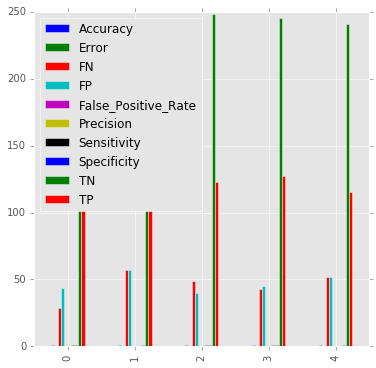

In [256]:
matricsTotal = []
sklearnLibraryMatrix = []
kf = sklearn.cross_validation.KFold(n=len(Y_spam), n_folds=10, shuffle=True)
for train_index, test_index in kf:
    X_train, X_test = (np.array([X_spam[a] for a in train_index])),(np.array([X_spam[a] for a  in test_index]))
    Y_train, Y_test = ([Y_spam[a] for a  in train_index]),([Y_spam[a] for a  in test_index])
    #print Y_train

# #   self implementaion
#     grad =  BinomialNB_Impl()
#     grad.fit(X_train,Y_train)
#     predicted_Y_values = grad.predict(X_test)
    
    
    # sklearnimplementation
    clf = MultinomialNB()
    clf.fit(X_train, Y_train)
    clf_predicted = clf.predict(X_test)
    
# # metrics genetation values
#     tm  = TestMetrics()
#     tm.setData(Y_test,predicted_Y_values)
#     TP,TN,FP,FN,Classification_Accuracy,Classification_Error,Sensitivity,Specificity,False_Positive_Rate,Precision =  tm.getMatrics()
#     matricsTotal.append({"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Accuracy":Classification_Accuracy,"Error":Classification_Error,"Sensitivity":Sensitivity,"Specificity":Specificity,"False_Positive_Rate":False_Positive_Rate,"Precision":Precision})

  
    clf_metrics  = TestMetrics()
    clf_metrics.setData(Y_test,clf_predicted)
    TP,TN,FP,FN,Classification_Accuracy,Classification_Error,Sensitivity,Specificity,False_Positive_Rate,Precision =  clf_metrics.getMatrics()
    sklearnLibraryMatrix.append({"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Accuracy":Classification_Accuracy,"Error":Classification_Error,"Sensitivity":Sensitivity,"Specificity":Specificity,"False_Positive_Rate":False_Positive_Rate,"Precision":Precision})



# df = pd.DataFrame(matricsTotal).head()
# df.plot(kind = 'bar',figsize =(10 ,10),stacked = False)
# print df

df_metrics =  pd.DataFrame(sklearnLibraryMatrix).head()
matplotlib.style.use('ggplot')
print  "values and tables generated from sklearn"
df_metrics.plot(kind = 'bar',figsize =(6,6),stacked = False)
print df_metrics